In [1]:
# pip install nba_api
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from nba_api.stats.static import teams

In [2]:
#https://pypi.org/project/nba-api/
# The method get_teams() returns a list of dictionaries the dictionary key id has a unique identifier for each team as a value
nba_teams= teams.get_teams()
nba_teams[:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [3]:
# consolidate all multiple dicts into one dict, so then able to create a table from 1 single dict
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [4]:
# use the team's nickname to find the unique id
df_warriors = df_teams[df_teams.nickname=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [5]:
id_warriors = df_warriors[['id']]
id_warriors

,id
7,1610612744


In [6]:
# to access the first column of the dataframe:
print(id_warriors.values)
id_warriors = id_warriors.values[0][0]
id_warriors

[[1610612744]]


1610612744

In [7]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter team_id_nullable is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.
The information requested is provided and is transmitted via an HTTP response this is assigned to the object gamefinder.

In [10]:
# Since https://stats.nba.com does lot allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# find stats for Warriors
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_warriors)
gamefinder

**plus_minus**: information on the score. If value=negative, the warriors lost by that many points. 
If value=positive, the warriors won by that amount of points.  
**match-up**: had the team the warriors were playing.   
**GSW** stands for Golden State   
**TOR**: means Toronto Raptors.   
**Versus**: signifies it was a home game  
**@** symbol: means an away game.   

We can create two DataFrames, one for the games where the warriors faced the raptors at home, 
and the second for away games. 
We can plot out the plus_minus column for both DataFrames. We see the warriors played 
better at home.
'''

In [26]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900967,2020-03-10,GSW vs. LAC,L,239,107,...,0.815,4.0,31.0,35.0,25,3,0,9,17,-24.0
1,22019,1610612744,GSW,Golden State Warriors,0021900944,2020-03-07,GSW vs. PHI,W,240,118,...,0.750,7.0,28.0,35.0,30,4,2,7,19,4.0
2,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
3,22019,1610612744,GSW,Golden State Warriors,0021900913,2020-03-03,GSW @ DEN,W,239,116,...,0.636,5.0,30.0,35.0,31,8,3,11,23,16.0
4,22019,1610612744,GSW,Golden State Warriors,0021900901,2020-03-01,GSW vs. WAS,L,239,110,...,0.708,18.0,34.0,52.0,25,7,7,21,24,-14.0


In [31]:
# create two dataframes, one for the games that the Warriors faced the raptors at home and the second for away games.
games_home = games[games.MATCHUP=='GSW vs. TOR']
games_away = games[games.MATCHUP=='GSW @ TOR']
games_home.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
2,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
73,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8,3,20,25,10.0
78,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11.0,31.0,42.0,28,9,6,16,23,-4.0
80,42018,1610612744,GSW,Golden State Warriors,0041800404,2019-06-07,GSW vs. TOR,L,241,92,...,0.667,8.0,34.0,42.0,26,6,6,17,23,-13.0
81,42018,1610612744,GSW,Golden State Warriors,0041800403,2019-06-05,GSW vs. TOR,L,241,109,...,0.833,13.0,28.0,41.0,25,8,3,14,21,-14.0


In [38]:
# calculate the mean for the column PLUS_MINUS for the dataframes games_home and  games_away
home_mean = games_home.PLUS_MINUS.mean()   # same as: games_home.mean()['PLUS_MINUS']
away_mean = games_away['PLUS_MINUS'].mean()   # same as: games_away.mean()['PLUS_MINUS']
print(home_mean)
print(away_mean)

3.2962962962962963
-0.6071428571428571


<IPython.core.display.Javascript object>


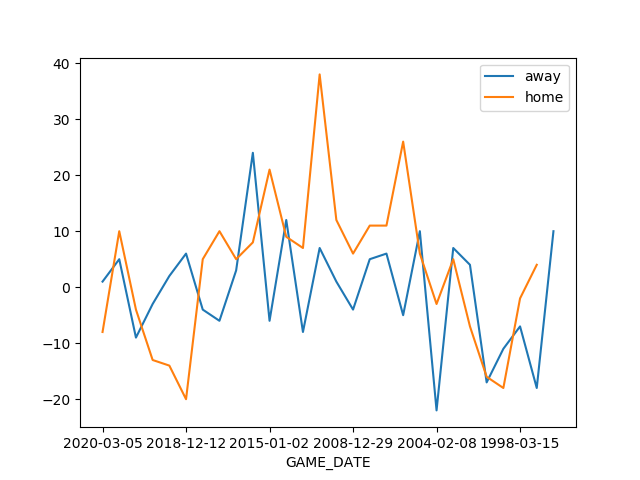

In [41]:
# plot out the PLUS MINUS column for the dataframes games_home and games_away. We see the warriors played better at home.
fig, ax = plt.subplots()
games_away.plot(x='GAME_DATE', y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE', y='PLUS_MINUS', ax=ax)
ax.legend(['away','home'])
plt.show()

In [ ]:
games.columns

In [ ]:
games.info()

In [ ]:
games.shape

In [ ]:
games.describe()